# Heart Disease Prediction


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here we will be experimenting with 5 algorithms 
1. K-NearestNeighborsClassifier
2. Logistic regression
3. Decision Tree
4. SVM Classifier
5. Navie Bayes Classifier

## EDA

In [23]:
df = pd.read_csv('C:/Users/Anusha/Desktop/WEB/heart_cleveland_upload.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [26]:
df.isnull().sum()*100/len(df)

age          0.0
sex          0.0
cp           0.0
trestbps     0.0
chol         0.0
fbs          0.0
restecg      0.0
thalach      0.0
exang        0.0
oldpeak      0.0
slope        0.0
ca           0.0
thal         0.0
condition    0.0
dtype: float64

In [27]:
df["condition"].value_counts()

0    160
1    137
Name: condition, dtype: int64

<AxesSubplot:xlabel='condition', ylabel='count'>

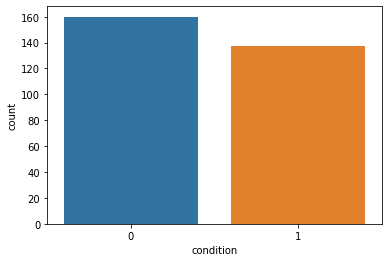

In [31]:
import seaborn as sns
sns.countplot(x='condition',data=df)

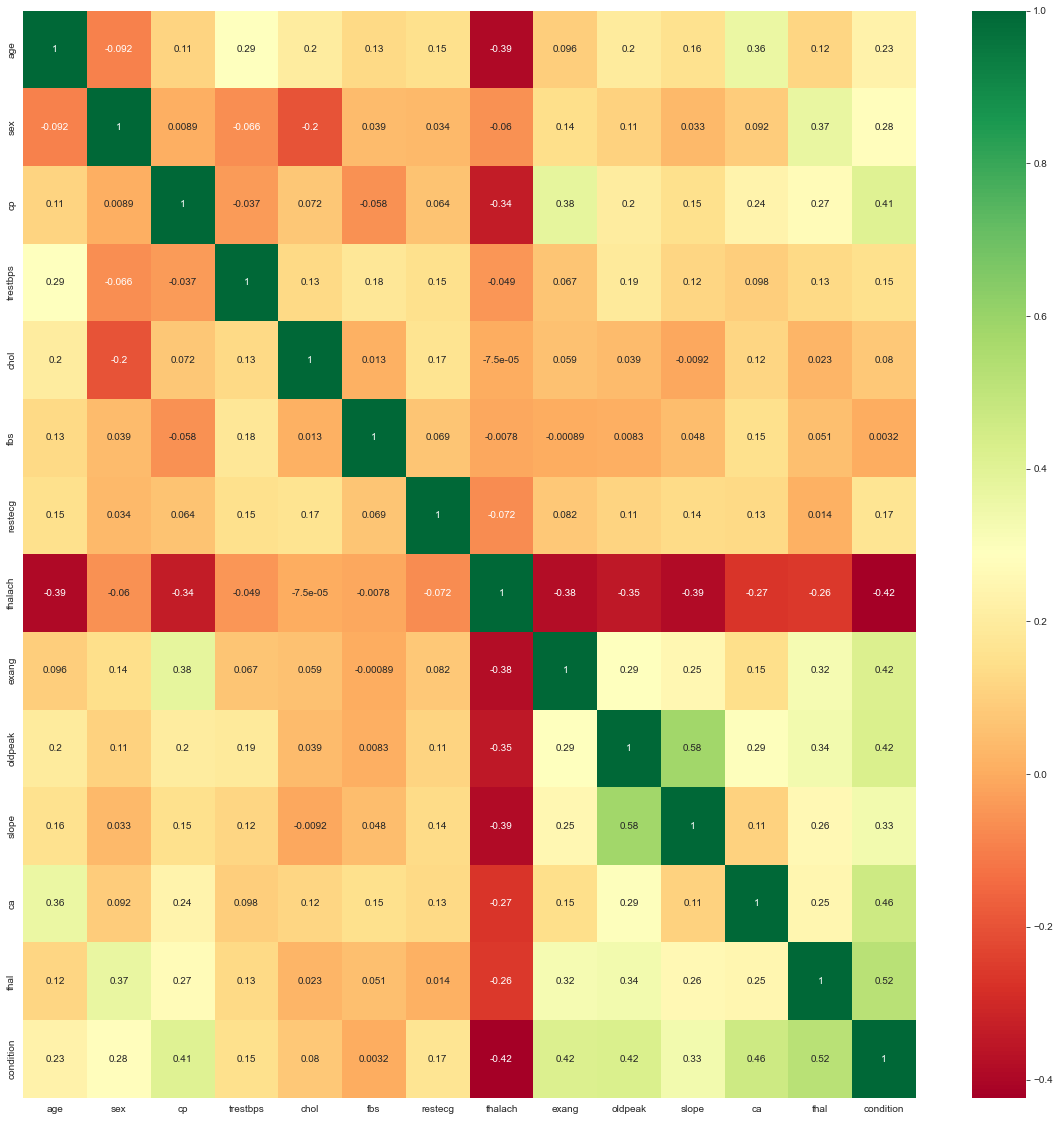

In [124]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [32]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [35]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,condition,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,1.600302,1.596266,-0.257179,-0.812095,-0.820813,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1.600302,0.468418,-0.160859,0.061157,0.639470,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,1.268242,1.032342,-0.411292,-1.554358,1.326662,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1.157555,0.355633,0.667499,1.065396,0.295874,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,1.046868,-1.223355,-0.700254,-0.244481,0.639470,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0


In [36]:
y = dataset['condition']
X = dataset.drop(['condition'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## KNN Classifier

In [130]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

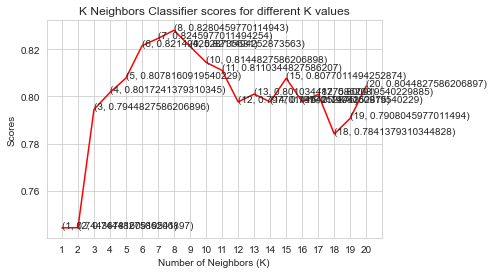

In [131]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [132]:
knn_classifier = KNeighborsClassifier(n_neighbors = 8)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8280459770114943

In [133]:
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[43  8]
 [ 5 34]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        51
           1       0.81      0.87      0.84        39

    accuracy                           0.86        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.86      0.86      0.86        90

0.8555555555555555


## Logistic regression

In [134]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[44  7]
 [ 6 33]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        51
           1       0.82      0.85      0.84        39

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90

0.8555555555555555


## Decision Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier  

DTclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
DTclassifier.fit(X_train, y_train)  
y_pred= DTclassifier.predict(X_test)  

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[40 11]
 [ 9 30]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        51
           1       0.73      0.77      0.75        39

    accuracy                           0.78        90
   macro avg       0.77      0.78      0.77        90
weighted avg       0.78      0.78      0.78        90

0.7777777777777778


## SVM Classifier

In [136]:
from sklearn.svm import SVC

SVMclassifier = SVC(kernel='linear', random_state=0)  
SVMclassifier.fit(X_train, y_train)  
y_pred= SVMclassifier.predict(X_test)  

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[40 11]
 [ 5 34]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        51
           1       0.76      0.87      0.81        39

    accuracy                           0.82        90
   macro avg       0.82      0.83      0.82        90
weighted avg       0.83      0.82      0.82        90

0.8222222222222222


## Naive Bayes

In [137]:
from sklearn.naive_bayes import GaussianNB  

NBclassifier = GaussianNB()  
NBclassifier.fit(X_train, y_train)
y_pred= NBclassifier.predict(X_test)  

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[41 10]
 [ 3 36]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        51
           1       0.78      0.92      0.85        39

    accuracy                           0.86        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.87      0.86      0.86        90

0.8555555555555555


### Accuracy of algorithm:
1. K-NearestNeighborsClassifier - 85.55%
2. Logistic regression - 85.55%
3. Decision Tree - 77.77%
4. SVM Classifier - 82.22%
5. Navie Bayes Classifier - 85.55%

### F1-Scores
1. K-NearestNeighborsClassifier - 0.87
2. Logistic regression - 0.87
3. Navie Bayes Classifier -0.86

### Precision
1. K-NearestNeighborsClassifier - 0.90
2. Logistic regression - 0.88

##### Therefore K-NearestNeighborsClassifier is the better model to use in this case